# Домашнее задание по кластеризации

Сегментация клиентов — это разделение рынка на отдельные группы клиентов со схожими характеристиками. Сегментация клиентов может быть мощным средством выявления неудовлетворенных потребностей клиентов. Используя вышеуказанные данные, компании могут превзойти конкурентов, разработав уникальные привлекательные продукты и услуги.

Вы владеете супермаркетом и с помощью членских карт у вас есть некоторые основные данные о ваших клиентах, такие как идентификатор клиента, возраст, пол, годовой доход и оценка расходов.

Вы хотите понять клиентов, например, кто является целевыми клиентами, чтобы это можно было передать маркетинговой команде и соответствующим образом спланировать стратегию.

Для этого вам нужно разбить клиентов на различные группы по похожести.

## Задания

### Задание 1.

Провести исследование данных с визуализацией:
1. Постройте Диаграмму разброса (точечный график) от двух переменных: `Age` и `Income`.
2. Построить график анализа пропущенных значений.
3. Построить boxplot для всех числовых переменных. График должен быть один, используя разные subplot() для каждой переменной (т.е. одна фигура и несколько сабплотов).
4. Построить barplot по переменной `Sex`.
5. Построить матрицу корреляции для всех переменных.

*P.s. Все графики, оси и переменные должны быть подписаны. И по графикам необходимо сделать выводы.*

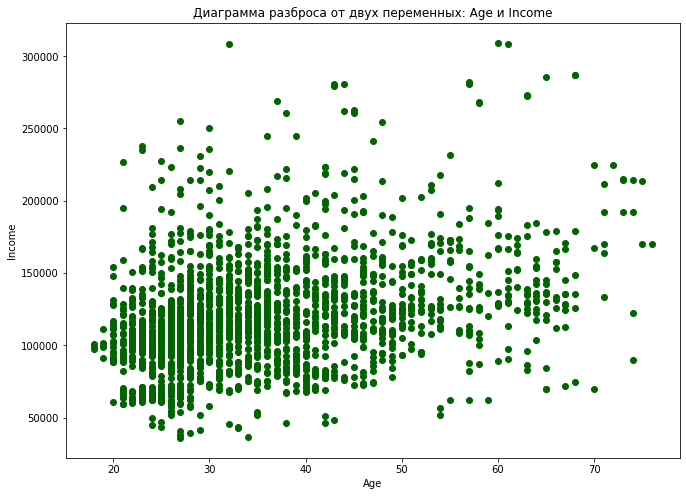

In [1]:
# это пример диаграммы пропущенных значений в датасете
# из нее видно что пропусков нет)
# а код чтобы построить такую диаграмму - вам надо написать самим)))
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
ur = "https://raw.githubusercontent.com/Adelaaas/Data_science_basic_22-23_2/main/home_work_clustering/segmentation%20data.csv" 
per = pd.read_csv(ur)
plt.figure(figsize = (11, 8))
plt.scatter(per['Age'], per['Income'], c = "darkgreen")
plt.title('Диаграмма разброса от двух переменных: Age и Income')
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()
#в основном люди от 20 до 50
#нет взаимосвязи между доходом и возрастом

In [16]:
per.isna()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False


<Figure size 720x432 with 0 Axes>

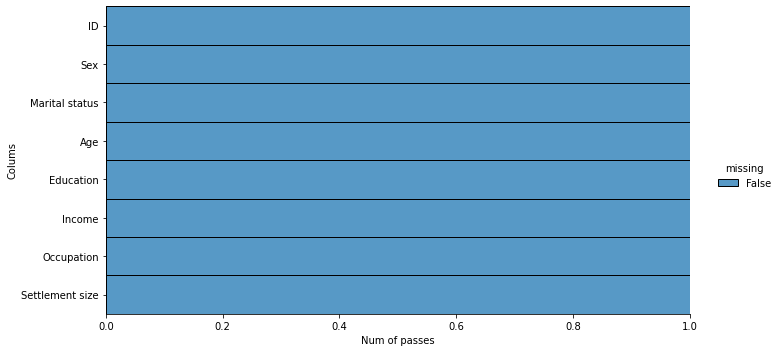

In [2]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.displot(data = per.isna().melt(value_name = "missing"), y = "variable", hue = "missing", multiple = "fill", aspect = 2)
plt.xlabel("Num of passes")
plt.ylabel("Colums")
plt.show()
#пропуски отсутствуют

Из графика следует то, что пропуски отсутствуют

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


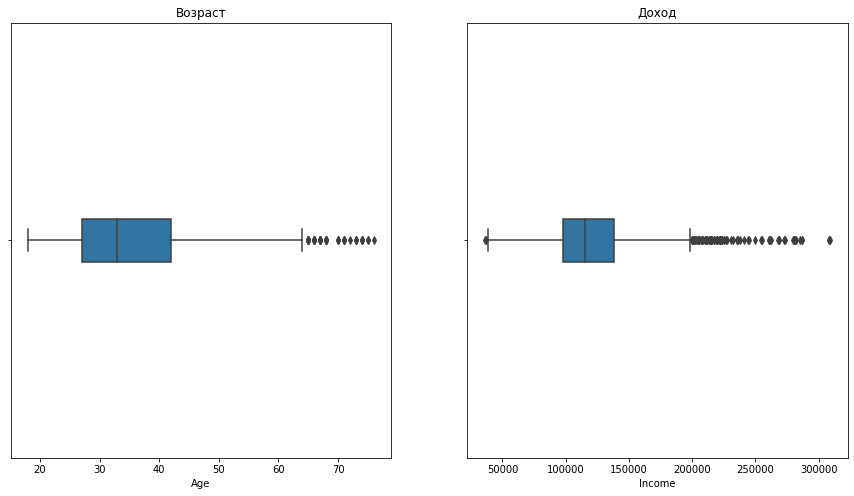

In [3]:
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize = (15, 8))

sns.boxplot(per['Age'], ax = ax[0], width = 0.1)
sns.boxplot(per['Income'], ax = ax[1], width = 0.1)

ax[0].set_title("Возраст")
ax[1].set_title("Доход")

plt.show()
#люди от 60, а доход от 20000

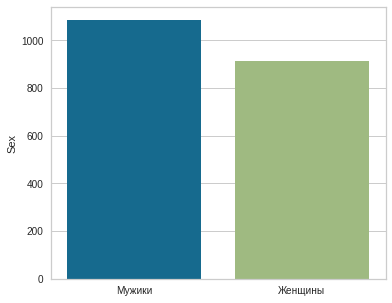

In [21]:
plt.figure(figsize=(6,5))
sns.barplot(data = per, x = ['Мужики', 'Женщины'], y = per['Sex'].value_counts())

plt.show()
#нулевой тратит больше единичного

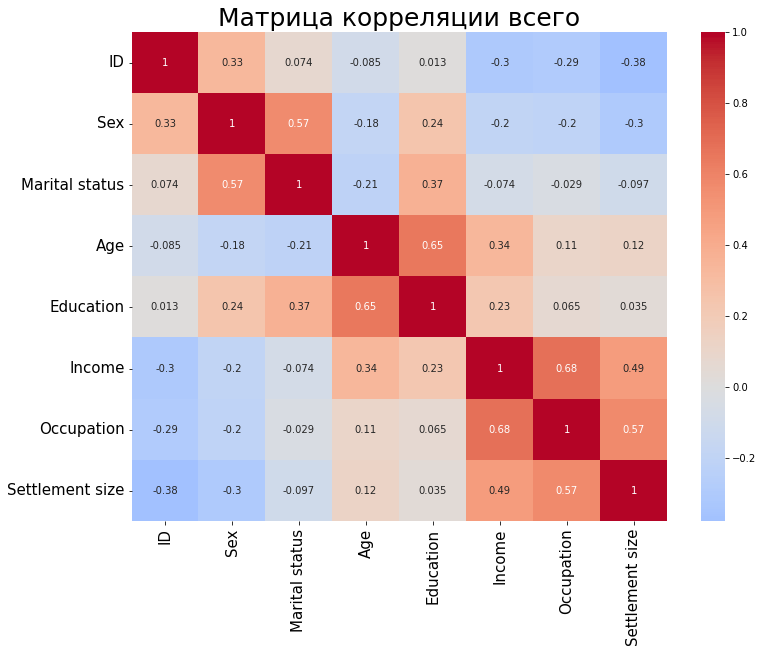

In [5]:
plt.figure(figsize=(12, 9))
sns.heatmap(per.corr(), xticklabels = per.corr().columns, yticklabels = per.corr().columns, cmap='coolwarm', center = 0, annot = True)

plt.title('Матрица корреляции всего', fontsize = 25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
#max 0.68 min -0.2

### Задание 2

Реализовать метод кластарезации KMeans:
1. Методом локтя и силуета (в том числе с использованием графиков) оценить оптимальное число кластеров и обосновать его.
2. Построить точечный график объектов до кластеризации и после с цветовым разделением на кластеры. Для построения графиков придется взять только две переменные как признаки, но строить кластеризацию не обязательно на двух переменных. 

P.s. все графики должны быть подписанны и к ним должны прилагаться выводы.

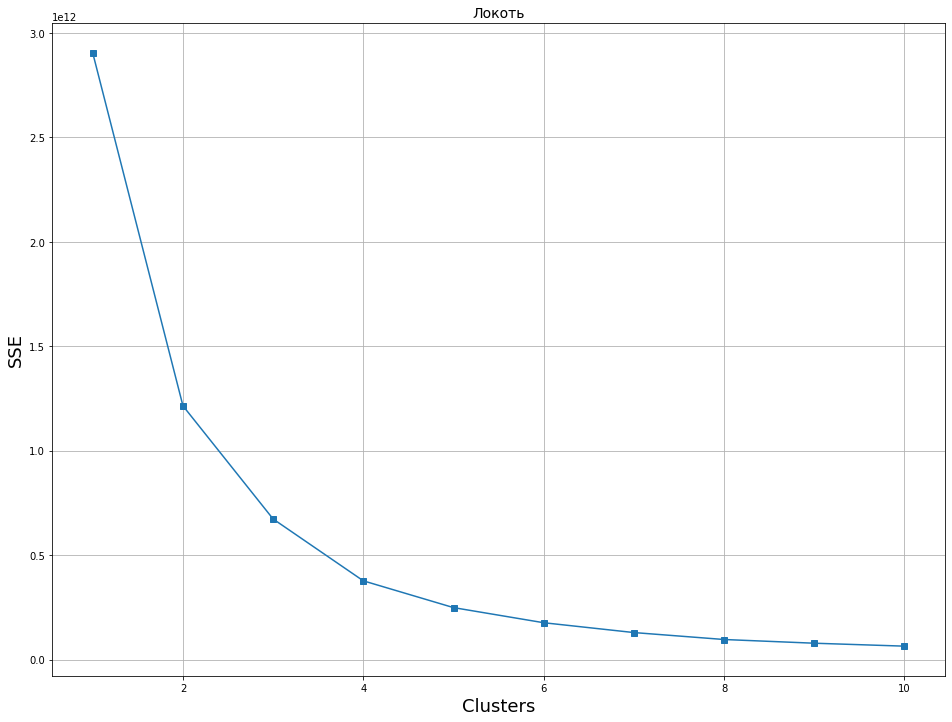

In [6]:
#метод локтя
from sklearn.cluster import KMeans
perk = per.loc[:, ["Sex",	"Marital status",	"Age",	"Education",	"Income",	"Occupation",	"Settlement size"]]


SSE = []
plt.figure(figsize = (16, 12))
plt.grid()
plt.title("Локоть", fontsize = 14)
for i in range(1, 11):
  kmn = KMeans(i);
  kmn.fit(perk)
  SSE.append(kmn.inertia_)

plt.plot(range(1,11), SSE, marker = "s")
plt.xlabel("Clusters", fontsize = 18)
plt.ylabel("SSE", fontsize = 18)
plt.show()
#оптимальное кол-во кластеров между 2 и 6

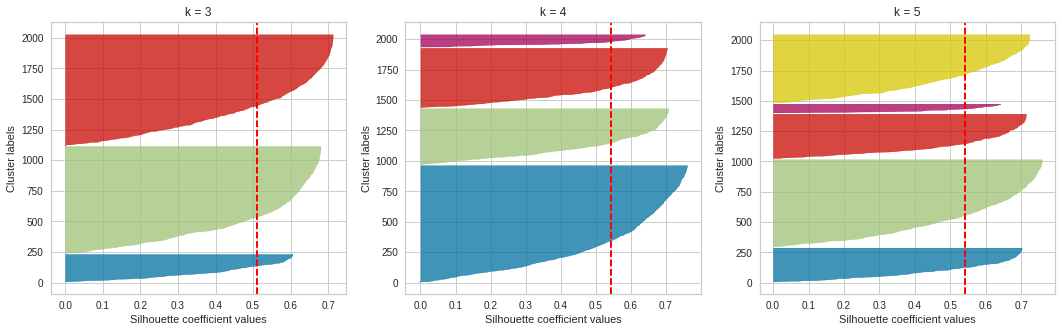

In [7]:
#метод силуета
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in [3, 4, 5]:
    km = KMeans(i)
    km.fit(perk.values)
    ax[i - 3].set_title("k = " + str(i))
    ax[i - 3].set_xlabel("Silhouette coefficient values")
    ax[i - 3].set_ylabel("Cluster labels")
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[i - 3])
    visualizer.fit(perk.values)
    visualizer.fit(perk.values)
#лучше всего взять примерно 3

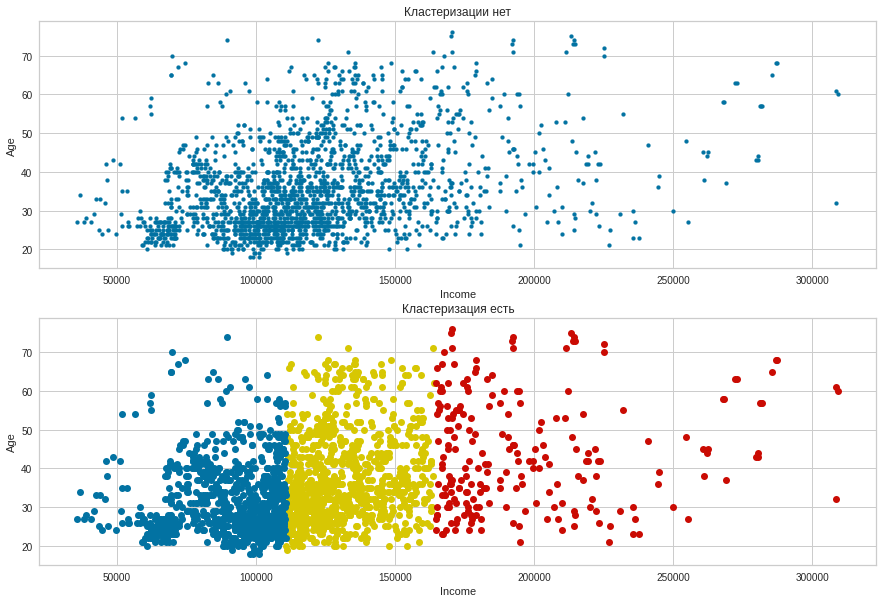

In [8]:
km = KMeans(3)
km.fit(per)
cl = pd.concat([per, pd.DataFrame(km.predict(per), columns = ["sig"])], axis = 1)
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].scatter(per['Income'], per['Age'], s = 15)
ax[0].set_title("Кластеризации нет")
ax[0].set_ylabel("Age")
ax[0].set_xlabel("Income")

ax[1].plot(cl[cl["sig"] == 0]['Income'], cl[cl["sig"] == 0]['Age'], 'yo')
ax[1].plot(cl[cl["sig"] == 1]['Income'], cl[cl["sig"] == 1]['Age'], 'ro')
ax[1].plot(cl[cl["sig"] == 2]['Income'], cl[cl["sig"] == 2]['Age'], 'bo')
ax[1].set_title("Кластеризация есть")
ax[1].set_xlabel("Income")
ax[1].set_ylabel("Age")
plt.show()
#разделение происходит в основном по доходам

### Задание 3

Реализовать иерархический метод кластарезации:
1. Должны быть построены дендрограммы и обоснован выбор количества кластеров.
2. Построить точечный график объектов до кластеризации и после с цветовым разделением на кластеры. Для построения графиков придется взять только две переменные как признаки, но строить кластеризацию не обязательно на двух переменных.

P.s. все графики должны быть подписанны и к ним должны прилагаться выводы.

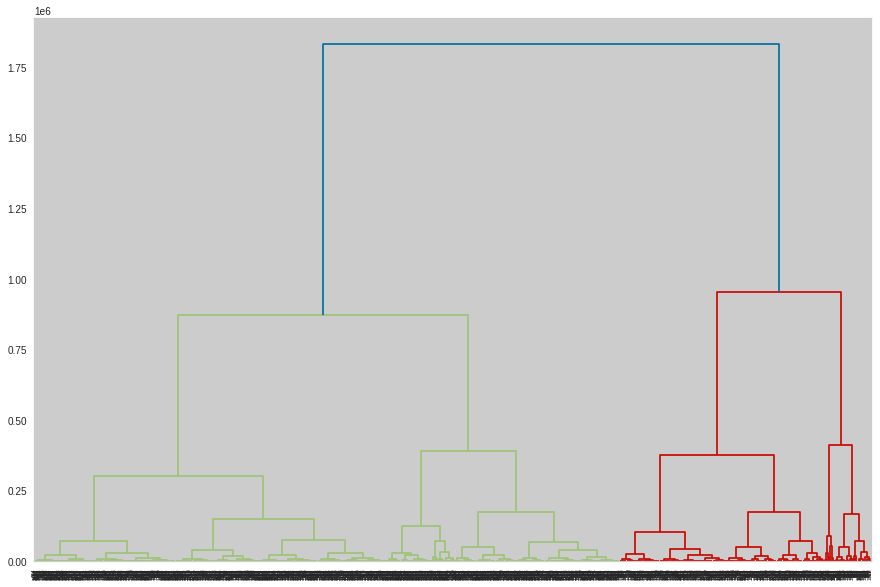

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(perk, 'ward')

fig = plt.figure(figsize=(15, 10))
dn = dendrogram(Z)
#лучше всего взять где-то 0.50

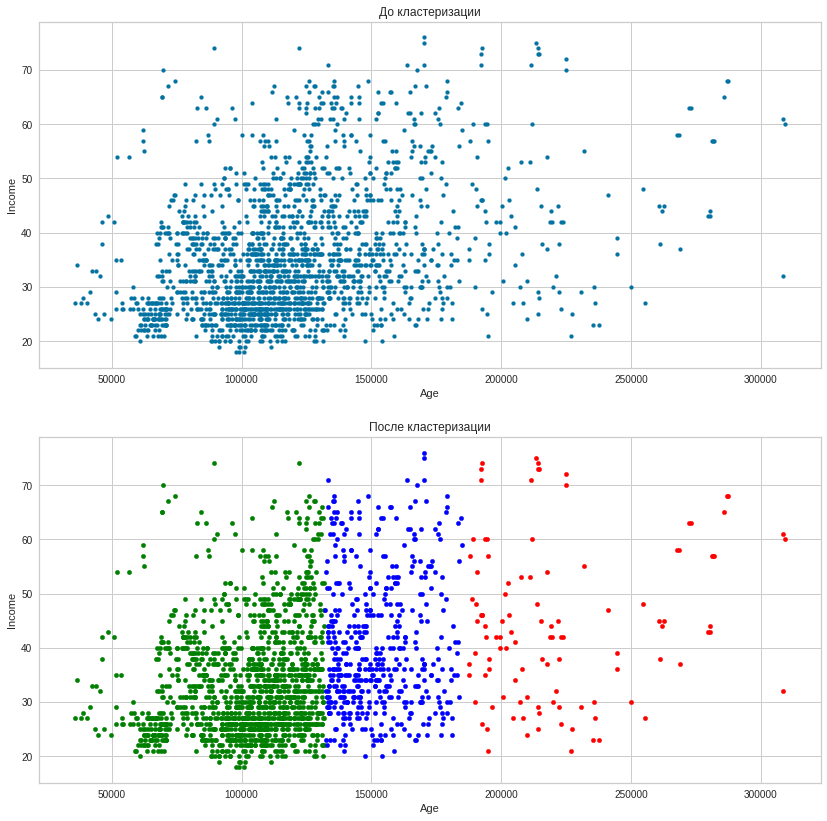

In [30]:
from scipy.cluster.hierarchy import fcluster
l = fcluster(Z, 3, criterion='maxclust')
perk['sig'] = locals

fig, ax = plt.subplots(2, 1, figsize=(14, 14))
ax[0].scatter(perk['Income'], perk['Age'], s=15)
ax[0].set_title("До кластеризации")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Income")

ax[1].scatter(perk.loc[l==3, 'Income'], perk.loc[l==3, 'Age'], s=20, marker='o', color='red')
ax[1].scatter(perk.loc[l==1, 'Income'], perk.loc[l==1, 'Age'], s=20, marker='o', color='green')
ax[1].scatter(perk.loc[l==2, 'Income'], perk.loc[l==2, 'Age'], s=20, marker='o', color='blue')
ax[1].set_title("После кластеризации")
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Income")

plt.show()